In [2]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# File to Load (Remember to change these)
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

# Read the City Data
city_data = pd.read_csv(city_data)

# Drop duplicate cities
city_data = city_data.drop_duplicates('city')

# Read the Ride Data
ride_data = pd.read_csv(ride_data)

# Combine the data into a single dataset
pyber_data = pd.merge(ride_data, city_data, on="city", how="left")
#pyber_data.head()
city_data.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


## Bubble Plot of Ride Sharing Data

In [3]:
# Average fare per city
average_fare = pyber_data.groupby("city")["fare"].mean()

# Total rides per city
total_rides = pyber_data.groupby("city")["ride_id"].count()

# Total number of drivers per city
total_drivers = pyber_data.groupby("city")["driver_count"].mean()


city_type = city_data.set_index('city')['type']
pyber_cities = pd.DataFrame({"Average Fare per City":average_fare,
                 "Number of Rides": total_rides,
                 "Number of Drivers": total_drivers,
                 "City Type": city_type})
pyber_cities.head()

,Average Fare per City,Number of Rides,Number of Drivers,City Type
Amandaburgh,24.641667,18,12,Urban
Barajasview,25.332273,22,26,Urban
Barronchester,36.422500,16,11,Suburban
Bethanyland,32.956111,18,22,Suburban
Bradshawfurt,40.064000,10,7,Rural


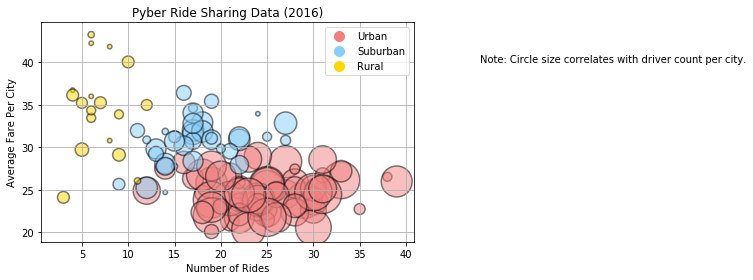

In [4]:
# Build the scatter plots for each city types

#Urban
urban = pyber_cities.loc[pyber_cities["City Type"]== "Urban"]
plt.scatter(urban["Number of Rides"], urban["Average Fare per City"], color = "lightcoral", edgecolors="black", s = urban["Number of Drivers"]*20, label = "Urban", alpha = 0.5, linewidth = 1.5)

#Suburban
suburban = pyber_cities.loc[pyber_cities["City Type"]== "Suburban"]
plt.scatter(suburban["Number of Rides"], suburban["Average Fare per City"], color = "lightskyblue", edgecolors ="black", s = suburban["Number of Drivers"]*20, label = "Suburban", alpha = 0.5, linewidth = 1.5)

#Rural
rural = pyber_cities.loc[pyber_cities["City Type"]== "Rural"]
plt.scatter(rural["Number of Rides"], rural["Average Fare per City"], color = "gold", edgecolors = "black", s = rural["Number of Drivers"]*20, label = "Rural", alpha = 0.5, linewidth = 1.5)

# Incorporate the other graph properties
plt.grid(True)
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Number of Rides")
plt.ylabel("Average Fare Per City")

# Create a legend
# lgnd = plt.legend(loc= "best", markerscale=2, scatterpoints=1, fontsize=10)
urban_lgnd = mlines.Line2D([], [], color='lightcoral', marker='o', linestyle='None',
                          markersize=10, label='Urban')
suburban_lgnd = mlines.Line2D([], [], color='lightskyblue', marker='o', linestyle='None',
                          markersize=10, label='Suburban')
rural_lgnd = mlines.Line2D([], [], color='gold', marker='o', linestyle='None',
                          markersize=10, label='Rural')

plt.legend(handles=[urban_lgnd, suburban_lgnd, rural_lgnd])


# Incorporate a text label regarding circle size
plt.text(48, 40,"Note: Circle size correlates with driver count per city.")

# Save Figure
plt.tight_layout()
plt.savefig("Pyber_Ride_Sharing_Data(2016).png")

In [5]:
# Show plot
plt.show()

## Total Fares by City Type

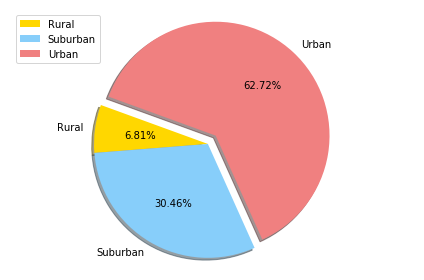

In [6]:
# Calculate Type Percents
city_fare_pie = pyber_data.groupby(["type"])["fare"].sum()

# Build Pie Chart
explode = (0,0, 0.1)
#Set the colors of each section of the pie chart.
colors = ["gold", "lightskyblue", "lightcoral"]

plt.pie(city_fare_pie, labels = city_fare_pie.index, autopct = "%1.2f%%", colors = colors, explode = explode, shadow = True, startangle = 160)
plt.axis("equal")
plt.legend(loc = "best")

# Save Figure
plt.tight_layout()
plt.savefig("Pyber_Total_Fares.png")


In [7]:
# Show Figure
plt.show()

## Total Rides by City Type

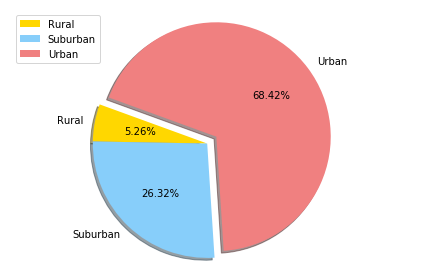

In [8]:
# Calculate Ride Percents
city_rides_pie = pyber_data.groupby(["type"])["ride_id"].count()

# Build Pie Chart
explode = (0,0, 0.1)
#Set the colors of each section of the pie chart.
colors = ["gold", "lightskyblue", "lightcoral"]

plt.pie(city_rides_pie, labels = city_fare_pie.index, autopct = "%1.2f%%", colors = colors, explode = explode, shadow = True, startangle = 160)
plt.axis("equal")
plt.legend(loc = "best")

# Save Figure
plt.tight_layout()
plt.savefig("Pyber_Total_Rides.png")

In [9]:
# Show Figure
plt.show()

## Total Drivers by City Type

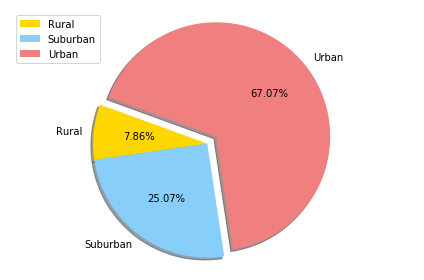

In [10]:
# Calculate Driver Percents
city_drivers_pie = pyber_data.groupby(["type"])["driver_count"].mean()

# Build Pie Charts
explode = (0,0, 0.1)
#Set the colors of each section of the pie chart.
colors = ["gold", "lightskyblue", "lightcoral"]

plt.pie(city_drivers_pie, labels = city_fare_pie.index, autopct = "%1.2f%%", colors = colors, explode = explode, shadow = True, startangle = 160)
plt.axis("equal")
plt.legend(loc = "best")

# Save Figure
plt.tight_layout()
plt.savefig("Pyber_Total_Drivers.png")


In [11]:
# Show Figure
plt.show()